In [12]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap
from nilearn import datasets
from nilearn import plotting
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from PIL import Image, ImageOps
from matplotlib.image import imread

lh_unknown
lh_corpuscallosum


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning:

you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning:

vmin cannot be chosen when cmap is symmetric



lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum
lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning:

you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True

/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning:

vmin cannot be chosen when cmap is symmetric



lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum
lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum


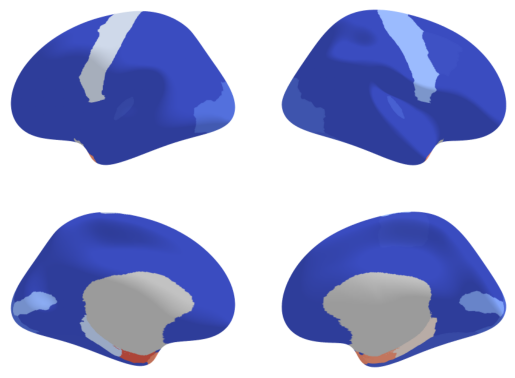

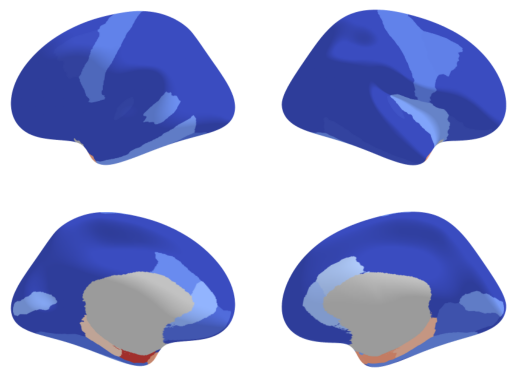

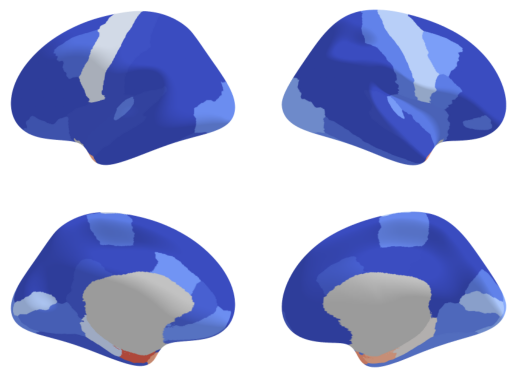

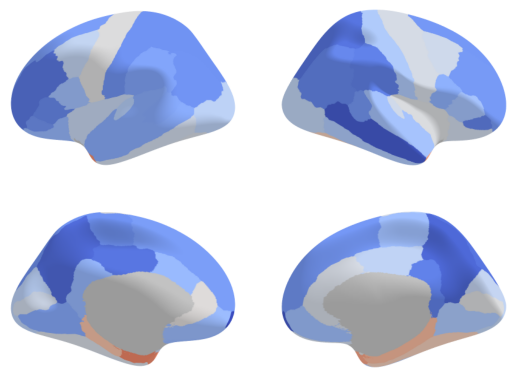

In [6]:
def trim_img(img_path):        # Open input image
    im = Image.open(img_path)
    
    # Convert image to grayscale
    im_gray = im.convert('L')
    
    # Invert grayscale image
    im_gray = ImageOps.invert(im_gray)
    
    # Get bounding box of non-zero regions from grayscale image and trim original image to it
    bbox = im_gray.getbbox()
    trimmed_image = im.crop(bbox)
    
    # Add new white border, then new black, then new white border
    res = ImageOps.expand(trimmed_image , border=1, fill=(255,255,255))
    res.save(img_path,dpi=(500,500))

# Define the colors
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#95b3bd', '#eef0f2', '#e54e38'])

beh_measures = ['Age','game1_acc']
brain_measures = ['thickness','volume']

subject_id = "fsaverage"
hemis = ['lh', 'rh']
views = ['lateral', 'medial']

for bm in beh_measures:
    # Load CSV data
    my_result = f'/mnt/workdir/DCM/Result/analysis/structure/structural_measures_corr-{bm}.csv'
    corr_data = pd.read_csv(my_result, index_col=0)
    for bam in brain_measures:
        output_files = []
        for i, hemi in enumerate(hemis):
            for j, view in enumerate(views):
                aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                                          subject_id, "label",
                                          hemi + ".aparc.annot")
                labels, ctab, names = nib.freesurfer.read_annot(aparc_file)
        
                roi_corr = []
        
                for name in names:
                    name = name.decode('UTF-8')
                    name = f'{hemi}_' + name
                    if name not in corr_data.index:
                        print(name)
                        roi_corr.append(0)
                    else:
                        roi_corr.append(corr_data.loc[name, f'{hemi}.{bam}'])
        
                roi_corr = np.array(roi_corr)
                vtx_data = roi_corr[labels]
                vtx_data[labels == -1] = 0
        
                surf_mesh = f'/mnt/workdir/DCM/BIDS/derivatives/freesurfer/fsaverage/surf/{hemi}.inflated'
                bg_map = f'/mnt/workdir/DCM/BIDS/derivatives/freesurfer/fsaverage/surf/{hemi}.sulc'
        
                output_file = f'/mnt/workdir/DCM/Result/paper/figure6/{bam}_corr-{bm}_{hemi}_{view}5.png'
        
                # Show colorbar only for lh subplots and set its location to left
                if hemi == 'lh':
                    hemip = 'left'
                elif hemi == 'rh':
                    hemip = 'right'

                if (hemi == 'lh') and (view=='medial'):
                    view_tuple = (-5,0)
                elif (hemi == 'lh' ) and (view == 'lateral'):
                    view_tuple = (5,180)
                elif (hemi == 'rh') and (view=='medial'):
                    view_tuple = (-5,180)
                elif (hemi == 'rh') and (view=='lateral'):
                    view_tuple = (5,0)
                
                if bm == 'Age':
                    thr = 0.3
                elif bm == 'game1_acc':
                    thr = 0.3
                plotting.plot_surf_roi(surf_mesh, roi_map=vtx_data, hemi=hemip, view=view_tuple,
                                       cmap='coolwarm', colorbar=False, symmetric_cmap=False,vmin=-thr-0.5,vmax=thr,
                                       bg_map=None, bg_on_data=False, engine='plotly',
                                       output_file=output_file, dpi=300)
                output_files.append(output_file)
                trim_img(output_file)
                
                if (hemi == 'lh' ) and (view == 'lateral'):
                    output_file = output_file.replace('lateral',  'lateral_colorbar')
                    plotting.plot_surf_roi(surf_mesh, roi_map=vtx_data, hemi=hemip, view=view_tuple,
                                           cmap='coolwarm', colorbar=True, symmetric_cmap=False, vmin=-thr-0.5, vmax=thr,
                                           bg_map=None, bg_on_data=False, engine='plotly',
                                           output_file=output_file.replace('figure6/','figure6/colorbar/'), dpi=300)
                
        img1 = imread(output_files[0])
        img2 = imread(output_files[2])
        img3 = imread(output_files[1])
        img4 = imread(output_files[3])
        
        # Create a 2x2 grid of subplots
        fig, axs = plt.subplots(2, 2)
        
        # Remove axes for all subplots
        for ax in axs.flat:
            ax.axis('off')
        
        # Display the images on the subplots
        axs[0, 0].imshow(img1)
        axs[0, 1].imshow(img2)
        axs[1, 0].imshow(img3)
        axs[1, 1].imshow(img4)
        
        # save the figure
        plt.savefig(f'/mnt/workdir/DCM/Result/paper/figure6/combine/{bam}_corr-{bm}_combined_mpl5.svg', dpi=300, bbox_inches='tight', pad_inches=0)

lh_unknown
lh_corpuscallosum


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning:

vmin cannot be chosen when cmap is symmetric



lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum
lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum


/home/dell/Software/anaconda3/lib/python3.8/site-packages/nilearn/plotting/js_plotting_utils.py:81: UserWarning:

vmin cannot be chosen when cmap is symmetric



lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum
lh_unknown
lh_corpuscallosum
lh_unknown
lh_corpuscallosum
rh_unknown
rh_corpuscallosum
rh_unknown
rh_corpuscallosum


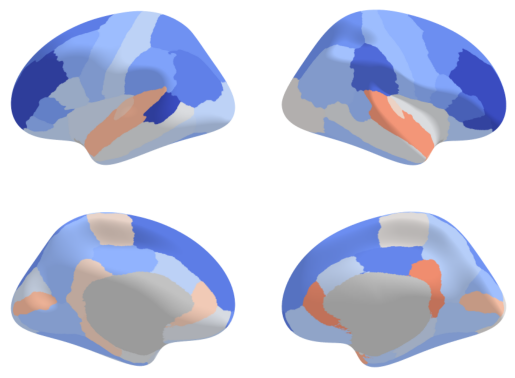

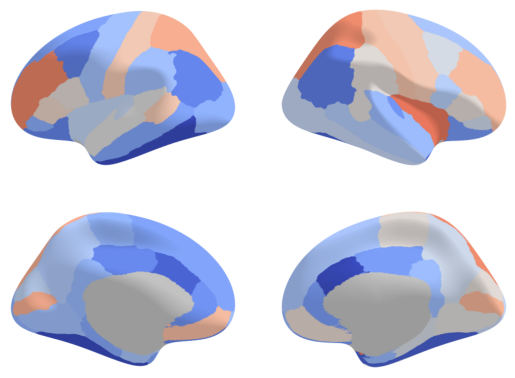

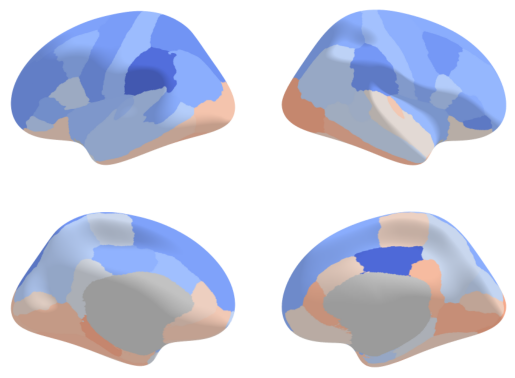

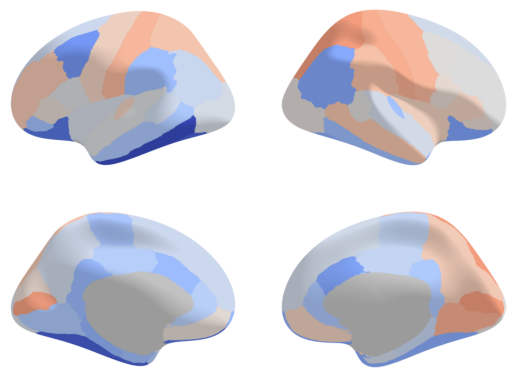

In [13]:
def trim_img(img_path):        # Open input image
    im = Image.open(img_path)

    # Convert image to grayscale
    im_gray = im.convert('L')

    # Invert grayscale image
    im_gray = ImageOps.invert(im_gray)

    # Get bounding box of non-zero regions from grayscale image and trim original image to it
    bbox = im_gray.getbbox()
    trimmed_image = im.crop(bbox)

    # Add new white border, then new black, then new white border
    res = ImageOps.expand(trimmed_image , border=1, fill=(255,255,255))
    res.save(img_path,dpi=(500,500))

# Define the colors
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#95b3bd', '#eef0f2', '#e54e38'])

beh_measures = ['Age','game1_acc']
brain_measures = ['FA','MD']

subject_id = "fsaverage"
hemis = ['lh', 'rh']
views = ['lateral', 'medial']

for bm in beh_measures:
    # Load CSV data
    my_result = f'/mnt/workdir/DCM/Result/analysis/structure/MRtrix/aparc_close1_dwi_measures_corr-{bm}.csv'
    corr_data = pd.read_csv(my_result, index_col=0)
    for bam in brain_measures:
        output_files = []
        for i, hemi in enumerate(hemis):
            for j, view in enumerate(views):
                aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                                          subject_id, "label",
                                          hemi + ".aparc.annot")
                labels, ctab, names = nib.freesurfer.read_annot(aparc_file)

                roi_corr = []

                for name in names:
                    name = name.decode('UTF-8')
                    name = f'{hemi}_' + name
                    if name not in corr_data.index:
                        print(name)
                        roi_corr.append(0)
                    else:
                        roi_corr.append(corr_data.loc[name, f'{hemi}.{bam}'])

                roi_corr = np.array(roi_corr)
                vtx_data = roi_corr[labels]
                vtx_data[labels == -1] = 0

                surf_mesh = f'/mnt/workdir/DCM/BIDS/derivatives/freesurfer/fsaverage/surf/{hemi}.inflated'
                bg_map = f'/mnt/workdir/DCM/BIDS/derivatives/freesurfer/fsaverage/surf/{hemi}.sulc'

                output_file = f'/mnt/workdir/DCM/Result/paper/figure6/dwi/{bam}_corr-{bm}_{hemi}_{view}5_close1_thr0.3.png'

                # Show colorbar only for lh subplots and set its location to left
                if hemi == 'lh':
                    hemip = 'left'
                elif hemi == 'rh':
                    hemip = 'right'

                if (hemi == 'lh') and (view=='medial'):
                    view_tuple = (-5,0)
                elif (hemi == 'lh' ) and (view == 'lateral'):
                    view_tuple = (5,180)
                elif (hemi == 'rh') and (view=='medial'):
                    view_tuple = (-5,180)
                elif (hemi == 'rh') and (view=='lateral'):
                    view_tuple = (5,0)

                if bm == 'Age':
                    thr = 0.3
                elif bm == 'game1_acc':
                    thr = 0.3
                plotting.plot_surf_roi(surf_mesh, roi_map=vtx_data, hemi=hemip, view=view_tuple,
                                       cmap='coolwarm', colorbar=False, symmetric_cmap=True,vmax=thr,vmin=-thr,
                                       bg_map=None, bg_on_data=False, engine='plotly',
                                       output_file=output_file, dpi=300)
                output_files.append(output_file)
                trim_img(output_file)

                if (hemi == 'lh' ) and (view == 'lateral'):
                    output_file = output_file.replace('lateral','lateral_colorbar')
                    plotting.plot_surf_roi(surf_mesh, roi_map=vtx_data, hemi=hemip, view=view_tuple,
                                           cmap='coolwarm', colorbar=True, symmetric_cmap=True,vmax=thr,vmin=-thr,
                                           bg_map=None, bg_on_data=False, engine='plotly',
                                           output_file=output_file, dpi=300)
                    trim_img(output_file)

        img1 = imread(output_files[0])
        img2 = imread(output_files[2])
        img3 = imread(output_files[1])
        img4 = imread(output_files[3])

        # Create a 2x2 grid of subplots
        fig, axs = plt.subplots(2, 2)

        # Remove axes for all subplots
        for ax in axs.flat:
            ax.axis('off')

        # Display the images on the subplots
        axs[0, 0].imshow(img1)
        axs[0, 1].imshow(img2)
        axs[1, 0].imshow(img3)
        axs[1, 1].imshow(img4)

        # save the figure
        plt.savefig(f'/mnt/workdir/DCM/Result/paper/figure6/combine_dwi/{bam}_corr-{bm}_combined_mpl5_close1_thr0.3.svg', dpi=300, bbox_inches='tight', pad_inches=0)